In [3]:
import pandas as pd
import os

import statistics
import numpy as np


In [8]:
NUMBER_OF_CLIENTS = 19
NUMBER_OF_ITERATIONS = 200
NUM_EPOCHS = 1
cycles = [0,1,2]

localInputFolderPath = "result_unbalanced_epoch_"+str(NUM_EPOCHS)+"_rounds_"+str(NUMBER_OF_ITERATIONS)+"_cycle_"


In [19]:
file = localInputFolderPath+"1/global_model_metrics_after_agregation.csv" 
print(file)
dataGeral = pd.read_csv(file)

dataGeral

result_unbalanced_epoch_1_rounds_200_cycle_1/global_model_metrics_after_agregation.csv


,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,-1,0,0.771026,awake,0.327635,0.668608,0.097510,0.170198,-0.011963,0.490405,[[ 34893 4610][ 86084 9301]],34893.0,4610.0,86084.0,9301.0
1,-1,0,0.771026,asleep,0.327635,0.288427,0.883300,0.434858,-0.011963,0.490405,[[ 9301 86084][ 4610 34893]],9301.0,86084.0,4610.0,34893.0
2,-1,0,0.771026,avg,0.327635,0.478517,0.490405,0.302528,-0.011963,0.490405,NaN,NaN,NaN,NaN,NaN
3,-1,1,0.707529,awake,0.702360,0.724513,0.934382,0.816172,0.096210,0.538249,[[ 5614 33889][ 6259 89126]],5614.0,33889.0,6259.0,89126.0
4,-1,1,0.707529,asleep,0.702360,0.472838,0.142116,0.218546,0.096210,0.538249,[[ 89126 6259][ 33889 5614]],89126.0,6259.0,33889.0,5614.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,-1,199,2.461321,asleep,0.749207,0.590593,0.468192,0.522317,0.355352,0.666890,[[ 82564 12821][ 21008 18495]],82564.0,12821.0,21008.0,18495.0
599,-1,199,2.461321,avg,0.749207,0.693879,0.666890,0.676143,0.355352,0.666890,NaN,NaN,NaN,NaN,NaN
600,-1,200,2.447532,awake,0.749681,0.797756,0.865409,0.830206,0.357069,0.667826,[[ 18576 20927][ 12838 82547]],18576.0,20927.0,12838.0,82547.0
601,-1,200,2.447532,asleep,0.749681,0.591329,0.470243,0.523880,0.357069,0.667826,[[ 82547 12838][ 20927 18576]],82547.0,12838.0,20927.0,18576.0


In [20]:
ss1 = dataGeral.loc[dataGeral['accuracy'] == dataGeral['accuracy'].max()]

ss1

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
24,-1,8,1.172139,awake,0.751772,0.799113,0.866897,0.831626,0.362429,0.670342,[[ 18716 20787][ 12696 82689]],18716.0,20787.0,12696.0,82689.0
25,-1,8,1.172139,asleep,0.751772,0.595823,0.473787,0.527843,0.362429,0.670342,[[ 82689 12696][ 20787 18716]],82689.0,12696.0,20787.0,18716.0
26,-1,8,1.172139,avg,0.751772,0.697468,0.670342,0.679735,0.362429,0.670342,NaN,NaN,NaN,NaN,NaN


In [21]:
dataGeralFiltered = dataGeral[:(NUMBER_OF_ITERATIONS*3)+3]

dataGeralFiltered

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,-1,0,0.771026,awake,0.327635,0.668608,0.097510,0.170198,-0.011963,0.490405,[[ 34893 4610][ 86084 9301]],34893.0,4610.0,86084.0,9301.0
1,-1,0,0.771026,asleep,0.327635,0.288427,0.883300,0.434858,-0.011963,0.490405,[[ 9301 86084][ 4610 34893]],9301.0,86084.0,4610.0,34893.0
2,-1,0,0.771026,avg,0.327635,0.478517,0.490405,0.302528,-0.011963,0.490405,NaN,NaN,NaN,NaN,NaN
3,-1,1,0.707529,awake,0.702360,0.724513,0.934382,0.816172,0.096210,0.538249,[[ 5614 33889][ 6259 89126]],5614.0,33889.0,6259.0,89126.0
4,-1,1,0.707529,asleep,0.702360,0.472838,0.142116,0.218546,0.096210,0.538249,[[ 89126 6259][ 33889 5614]],89126.0,6259.0,33889.0,5614.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,-1,199,2.461321,asleep,0.749207,0.590593,0.468192,0.522317,0.355352,0.666890,[[ 82564 12821][ 21008 18495]],82564.0,12821.0,21008.0,18495.0
599,-1,199,2.461321,avg,0.749207,0.693879,0.666890,0.676143,0.355352,0.666890,NaN,NaN,NaN,NaN,NaN
600,-1,200,2.447532,awake,0.749681,0.797756,0.865409,0.830206,0.357069,0.667826,[[ 18576 20927][ 12838 82547]],18576.0,20927.0,12838.0,82547.0
601,-1,200,2.447532,asleep,0.749681,0.591329,0.470243,0.523880,0.357069,0.667826,[[ 82547 12838][ 20927 18576]],82547.0,12838.0,20927.0,18576.0


In [22]:
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dataGeralFiltered.loc[dataGeralFiltered['class'] == "avg"]

ss1 = ss.loc[ss['accuracy'] == ss['accuracy'].max()]
ss1

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
26,-1,8,1.172139,avg,0.751772,0.697468,0.670342,0.679735,0.362429,0.670342,NaN,NaN,NaN,NaN,NaN


In [13]:
dataGeralFiltered.loc[dataGeralFiltered['round'] == ss1['round'].max()]

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
24,-1,8,0.58082,awake,0.756724,0.777512,0.918929,0.842326,0.325919,0.641995,[[ 14421 25082][ 7733 87652]],14421.0,25082.0,7733.0,87652.0
25,-1,8,0.58082,asleep,0.756724,0.650943,0.365061,0.467781,0.325919,0.641995,[[ 87652 7733][ 25082 14421]],87652.0,7733.0,25082.0,14421.0
26,-1,8,0.58082,avg,0.756724,0.714228,0.641995,0.655054,0.325919,0.641995,NaN,NaN,NaN,NaN,NaN


In [ ]:
def getMetricsFromCycle(inputFolder):
    globalFileName = inputFolder+"/global_model_metrics_after_agregation.csv" 
    dataGeral = pd.read_csv(file)

In [24]:
a = "result_unbalanced_epoch_1_rounds_200_cycle_1/proxy_data_before_fit_MLP_client_13_round_1.csv"
a = "result_unbalanced_epoch_1_rounds_200_cycle_1/proxy_data_after_fit_MLP_client_13_round_1.csv"
#result_unbalanced_epoch_1_rounds_200_cycle_2\proxy_data_after_fit_MLP_client_17_round_1.csv
pd.read_csv(a)

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,13,1,0.695317,awake,0.65289,0.710657,0.858793,0.777734,0.017011,0.507252,[[ 6151 33352][ 13469 81916]],6151.0,33352.0,13469.0,81916.0
1,13,1,0.695317,asleep,0.65289,0.313507,0.155710,0.208075,0.017011,0.507252,[[ 81916 13469][ 33352 6151]],81916.0,13469.0,33352.0,6151.0
2,13,1,0.695317,avg,0.65289,0.512082,0.507252,0.492904,0.017011,0.507252,NaN,NaN,NaN,NaN,NaN


In [34]:
allData = []

# local_data_before_fit_MLP_client_0_round_0.csv
# proxy_data_after_fit_MLP_client_4_round_0.csv

dataGeralFilteredAvg = dataGeralFiltered.loc[dataGeralFiltered['class'] == "avg"]

inputFolders = localInputFolderPath +"2/"

df = pd.DataFrame(columns=["round","min_accuracy","max_accuracy","global_accuracy","median","avg","sd","clients"])
# pegar acurática
for iterationI in range(1,NUMBER_OF_ITERATIONS+1):
    countCli = 0
    itetarionAccuracy = []
    for clientI in range(0,NUMBER_OF_CLIENTS):
        file = inputFolders+"local_data_before_fit_MLP_client_"+str(clientI)+"_round_" +str(iterationI)+".csv" # local_model_results_MLP_unbalanced_client_0_round_1
        file = inputFolders+"proxy_data_after_fit_MLP_client_"+str(clientI)+"_round_" +str(iterationI)+".csv" # local_model_results_MLP_unbalanced_client_0_round_1
        #print(file)
        if(os.path.isfile(file)):
            dataF = pd.read_csv(file)
            accuracy = dataF['accuracy'][0]
            itetarionAccuracy.append(accuracy)
            countCli = countCli + 1
            
    # global accuracy local_model_results_MLP_client_0_round_0
    #file = inputFolders+"global_model_MLP_unbalanced_client_0_round_" +str(iterationI)+".csv" # local_model_results_MLP_unbalanced_client_0_round_1
    #dataF = pd.read_csv(file)
    accuracySeries = dataGeralFilteredAvg[iterationI:(iterationI+1)]['accuracy']
    global_accuracy = accuracySeries.values[0]
    # global_model_MLP_unbalanced_client_0_round_1
    # iterationI
    minAcc = min(itetarionAccuracy)
    maxAcc = max(itetarionAccuracy)
    avgAcc = sum(itetarionAccuracy)/len(itetarionAccuracy)
    sd = np.std(itetarionAccuracy)
    median = statistics.median(itetarionAccuracy)

    # countCli
    print("Round ",iterationI,"Clients: ",countCli)
    ## add on dataframe
    values = [[iterationI,minAcc,maxAcc,global_accuracy,median,avgAcc,sd,countCli]]
    dfConc = pd.DataFrame(values,
                          columns=["round","min_accuracy","max_accuracy","global_accuracy","avg","median","sd","clients"])
    # append
    df = pd.concat([df,dfConc])

Round  1 Clients:  19
Round  2 Clients:  19
Round  3 Clients:  19
Round  4 Clients:  19
Round  5 Clients:  19
Round  6 Clients:  19
Round  7 Clients:  19
Round  8 Clients:  19
Round  9 Clients:  19
Round  10 Clients:  19
Round  11 Clients:  19
Round  12 Clients:  19
Round  13 Clients:  19
Round  14 Clients:  19
Round  15 Clients:  19
Round  16 Clients:  19
Round  17 Clients:  19
Round  18 Clients:  19
Round  19 Clients:  19
Round  20 Clients:  19
Round  21 Clients:  19
Round  22 Clients:  19
Round  23 Clients:  19
Round  24 Clients:  19
Round  25 Clients:  19
Round  26 Clients:  19
Round  27 Clients:  19
Round  28 Clients:  19
Round  29 Clients:  19
Round  30 Clients:  19
Round  31 Clients:  19
Round  32 Clients:  19
Round  33 Clients:  19
Round  34 Clients:  19
Round  35 Clients:  19
Round  36 Clients:  19
Round  37 Clients:  19
Round  38 Clients:  19
Round  39 Clients:  19
Round  40 Clients:  19
Round  41 Clients:  19
Round  42 Clients:  19
Round  43 Clients:  19
Round  44 Clients:  

In [35]:
itetarionAccuracy

[0.749429156040567,
 0.7449736077338236,
 0.7409109779965601,
 0.7410814898285986,
 0.7461152956526896,
 0.7460115058418836,
 0.7515197793725165,
 0.7480057529209418,
 0.7445806891643437,
 0.7417042286934346,
 0.7470197497182848,
 0.7456704821778067,
 0.7473385327086175,
 0.7495403594092878,
 0.7478130004151592,
 0.748858312081134,
 0.7497627661467291,
 0.7440469129944843,
 0.7463451159480458]

In [24]:
max(itetarionAccuracy)

0.7586145542968982

In [25]:
ss1 = dataGeral.loc[dataGeral['accuracy'] == dataGeral['accuracy'].max()]

ss1

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
24,-1,8,0.58082,awake,0.756724,0.777512,0.918929,0.842326,0.325919,0.641995,[[ 14421 25082][ 7733 87652]],14421.0,25082.0,7733.0,87652.0
25,-1,8,0.58082,asleep,0.756724,0.650943,0.365061,0.467781,0.325919,0.641995,[[ 87652 7733][ 25082 14421]],87652.0,7733.0,25082.0,14421.0
26,-1,8,0.58082,avg,0.756724,0.714228,0.641995,0.655054,0.325919,0.641995,NaN,NaN,NaN,NaN,NaN


In [26]:
x = ss[iterationI:(iterationI+1)]['accuracy']
x.values[0]

0.7423862760215882

In [27]:
df

,round,min_accuracy,max_accuracy,global_accuracy,median,avg,sd,clients
0,1,0.313593,0.727322,0.707098,0.653494,0.703287,0.108668,19
0,2,0.338451,0.731199,0.725098,0.653678,0.703821,0.105334,19
0,3,0.329473,0.730791,0.729709,0.658350,0.706431,0.105260,19
0,4,0.327197,0.730895,0.739621,0.660177,0.708173,0.107637,19
0,5,0.323216,0.738220,0.743224,0.661050,0.707387,0.113435,19
...,...,...,...,...,...,...,...,...
0,196,0.407375,0.756924,0.744573,0.662946,0.699173,0.097472,19
0,197,0.383036,0.755123,0.745826,0.657956,0.707328,0.104333,19
0,198,0.414121,0.751290,0.745522,0.665905,0.710122,0.098464,19
0,199,0.429994,0.758755,0.741215,0.661501,0.707535,0.096583,19


In [20]:
dfConc

,round,min_accuracy,max_accuracy,global_accuracy,avg,median,sd,clients
0,200,0.411845,0.758615,0.742386,0.702094,0.660546,0.100768,19


In [21]:
df

,round,min_accuracy,max_accuracy,global_accuracy,median,avg,sd,clients
0,1,0.313593,0.727322,0.707098,0.653494,0.703287,0.108668,19
0,2,0.338451,0.731199,0.725098,0.653678,0.703821,0.105334,19
0,3,0.329473,0.730791,0.729709,0.658350,0.706431,0.105260,19
0,4,0.327197,0.730895,0.739621,0.660177,0.708173,0.107637,19
0,5,0.323216,0.738220,0.743224,0.661050,0.707387,0.113435,19
...,...,...,...,...,...,...,...,...
0,196,0.407375,0.756924,0.744573,0.662946,0.699173,0.097472,19
0,197,0.383036,0.755123,0.745826,0.657956,0.707328,0.104333,19
0,198,0.414121,0.751290,0.745522,0.665905,0.710122,0.098464,19
0,199,0.429994,0.758755,0.741215,0.661501,0.707535,0.096583,19


In [22]:
print("Global accuracy",df["global_accuracy"].max())

print("local accuracy",df["max_accuracy"].max())

Global accuracy 0.756724097028646
local accuracy 0.7651014174722733


In [19]:

from datetime import datetime
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt


<Axes: xlabel='round'>

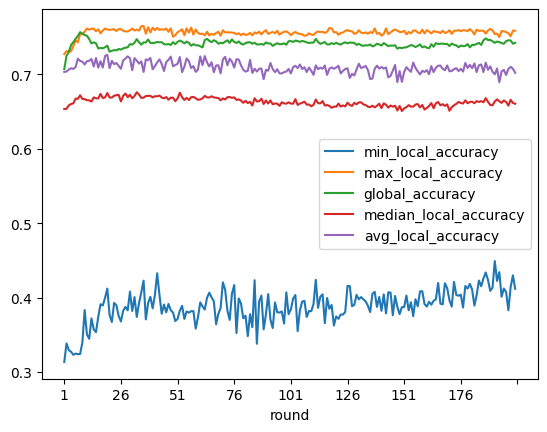

In [28]:
metrics = ["round","min_accuracy","max_accuracy","global_accuracy","median","avg"]
metrics = ["round","min_local_accuracy","max_local_accuracy","global_accuracy","median_local_accuracy","avg_local_accuracy"]

df['min_local_accuracy'] = df['min_accuracy']
df['max_local_accuracy'] = df['max_accuracy']
df['median_local_accuracy'] = df['median']
df['avg_local_accuracy'] = df['avg']

dfMetricsClass = df[metrics]
lines = dfMetricsClass.plot.line(x='round')

lines

In [21]:
lines.figure.savefig('metrics_flower_isabela_unbalanced_fix.pdf')